![Mushrooms](assets/mushrooms.png)

# Mushroom Classification

## Content

### Dataset
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

### Inspiration
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?

### Libraries
- [pandas](https://pandas.pydata.org) (data manipulation and analysis)
- [NumPy](https://numpy.org) (numerical computing)
- [Matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org) (data visualization)
- [scikit-learn](https://scikit-learn.org) (machine learning)

### Acknowledgement
This dataset was originally donated to the UCI Machine Learning Repository. You can learn more about past research using the data [here](https://archive.ics.uci.edu/ml/datasets/Mushroom).

### Author
[LinkedIn](https://www.linkedin.com/in/brckalo)
[GitHub](https://github.com/brckalo)
[Instagram](https://www.instagram.com/brckalo_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv("data/mushroom_classification_dataset.csv")

In [3]:
df = df.rename(columns=str.lower)

for column in df.columns.tolist():
    df[column] = df[column].apply(lambda x: x.lower()) 

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,green,no bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
categorical_features = df.drop(columns="class").columns.tolist()

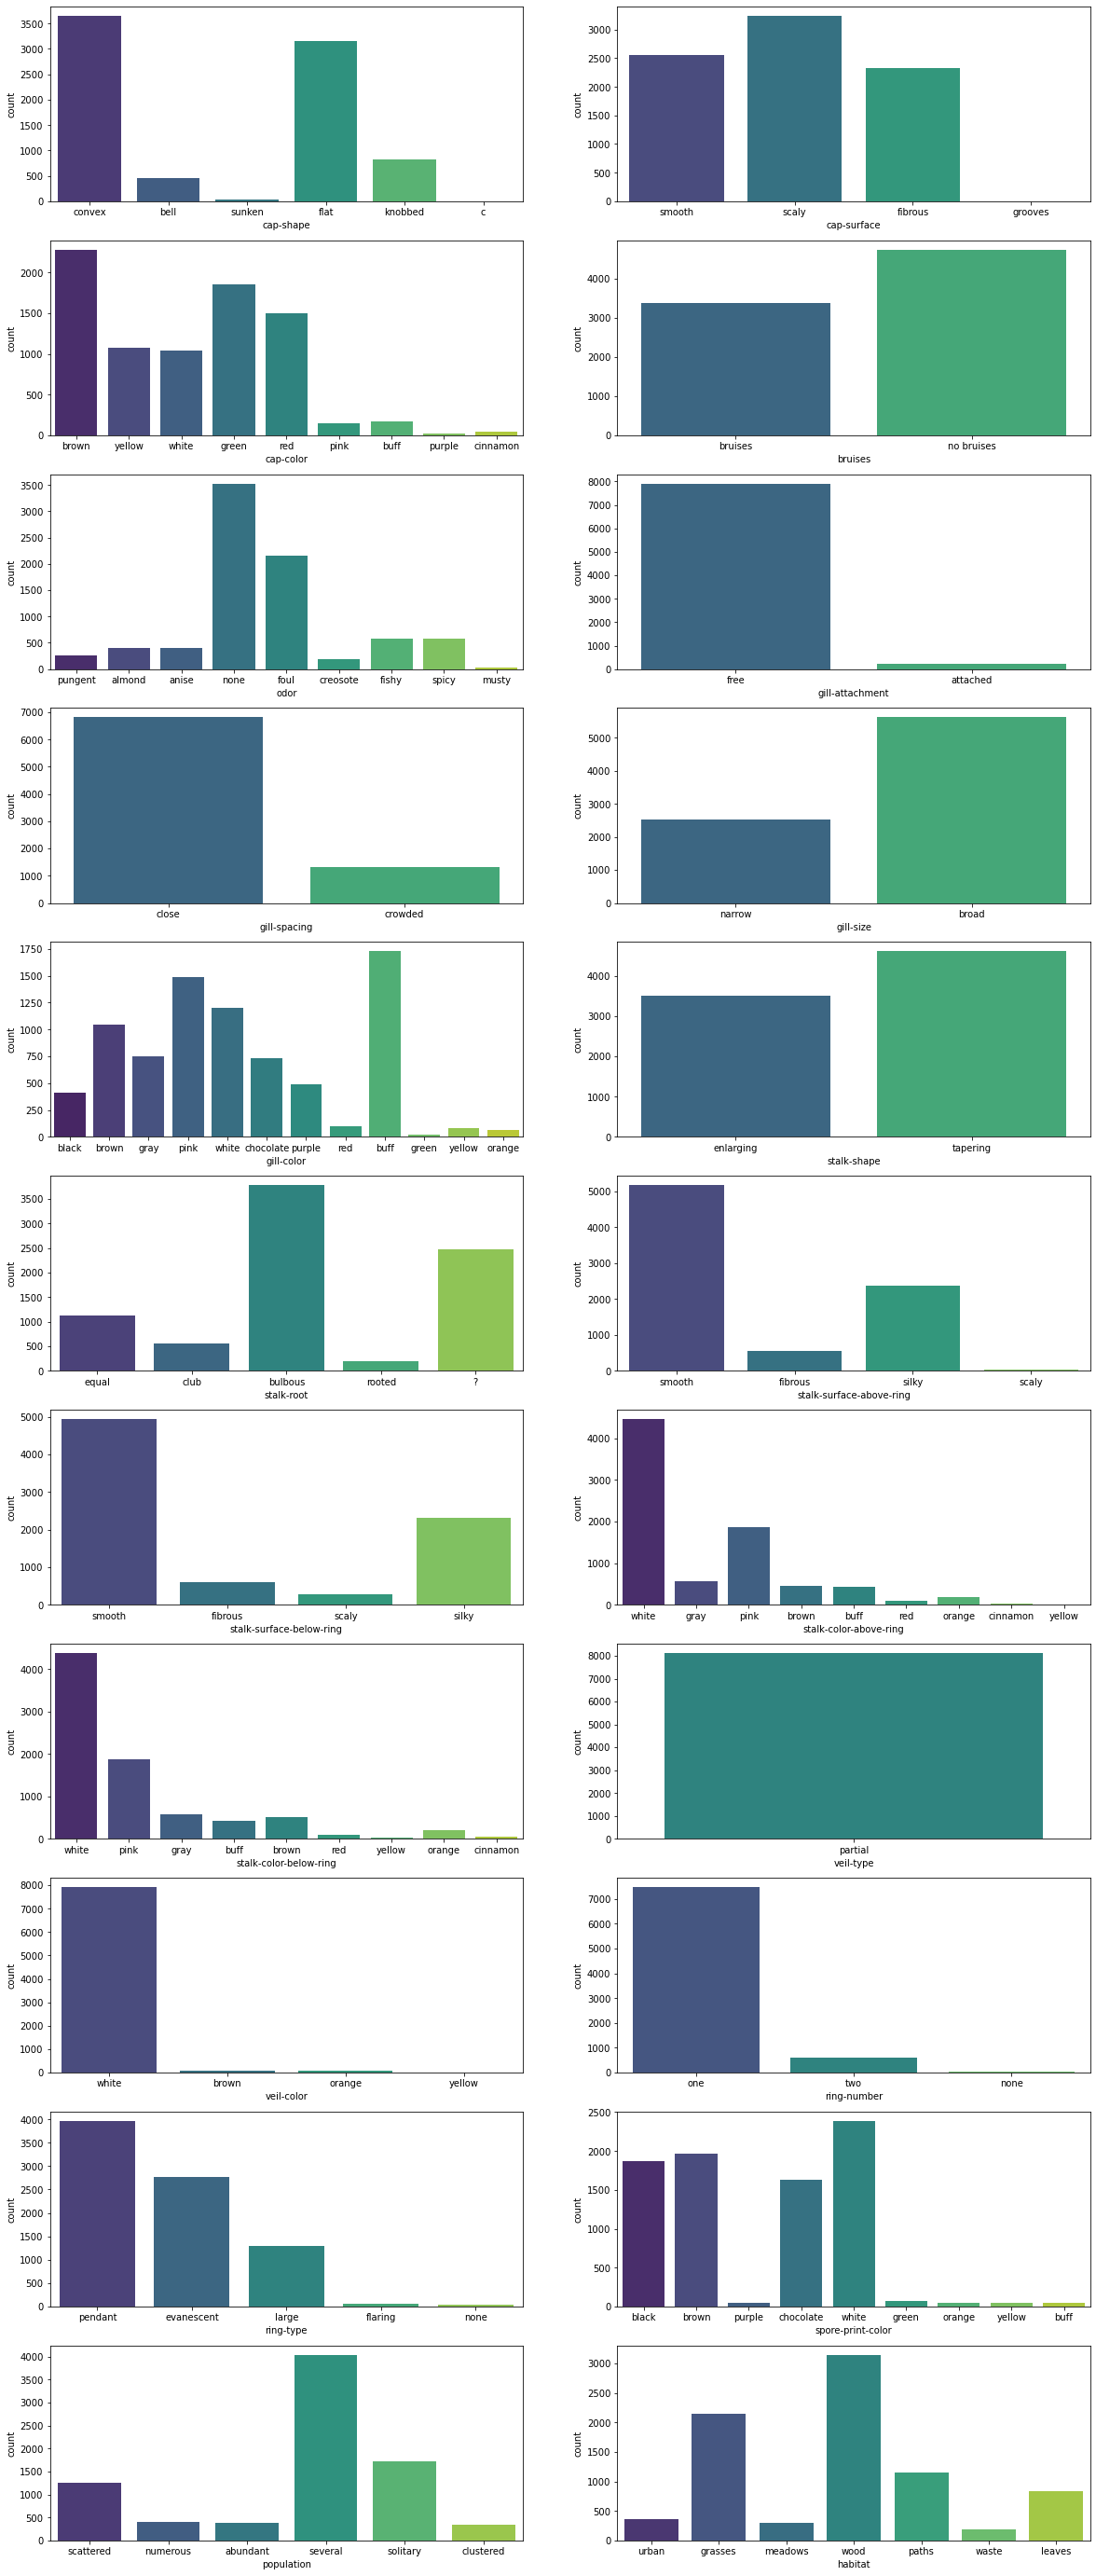

In [9]:
fig,ax = plt.subplots(nrows=11,ncols=2,figsize=(20,50))

for i in range(11):
    for j in range(2):
        sns.countplot(x=categorical_features[2*i+j],data=df,palette="viridis",ax=ax[i,j])

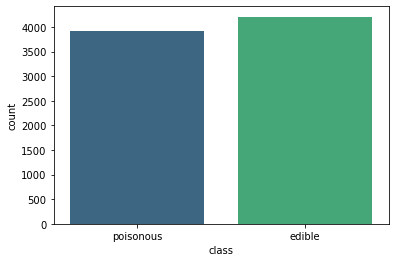

In [10]:
sns.countplot(x="class",data=df,palette="viridis")

plt.show()

In [11]:
df = df.drop(columns="veil-type")

categorical_features.remove("veil-type")

In [12]:
df[categorical_features] = OrdinalEncoder().fit_transform(df[categorical_features])

In [13]:
df["class"] = LabelEncoder().fit_transform(df["class"])

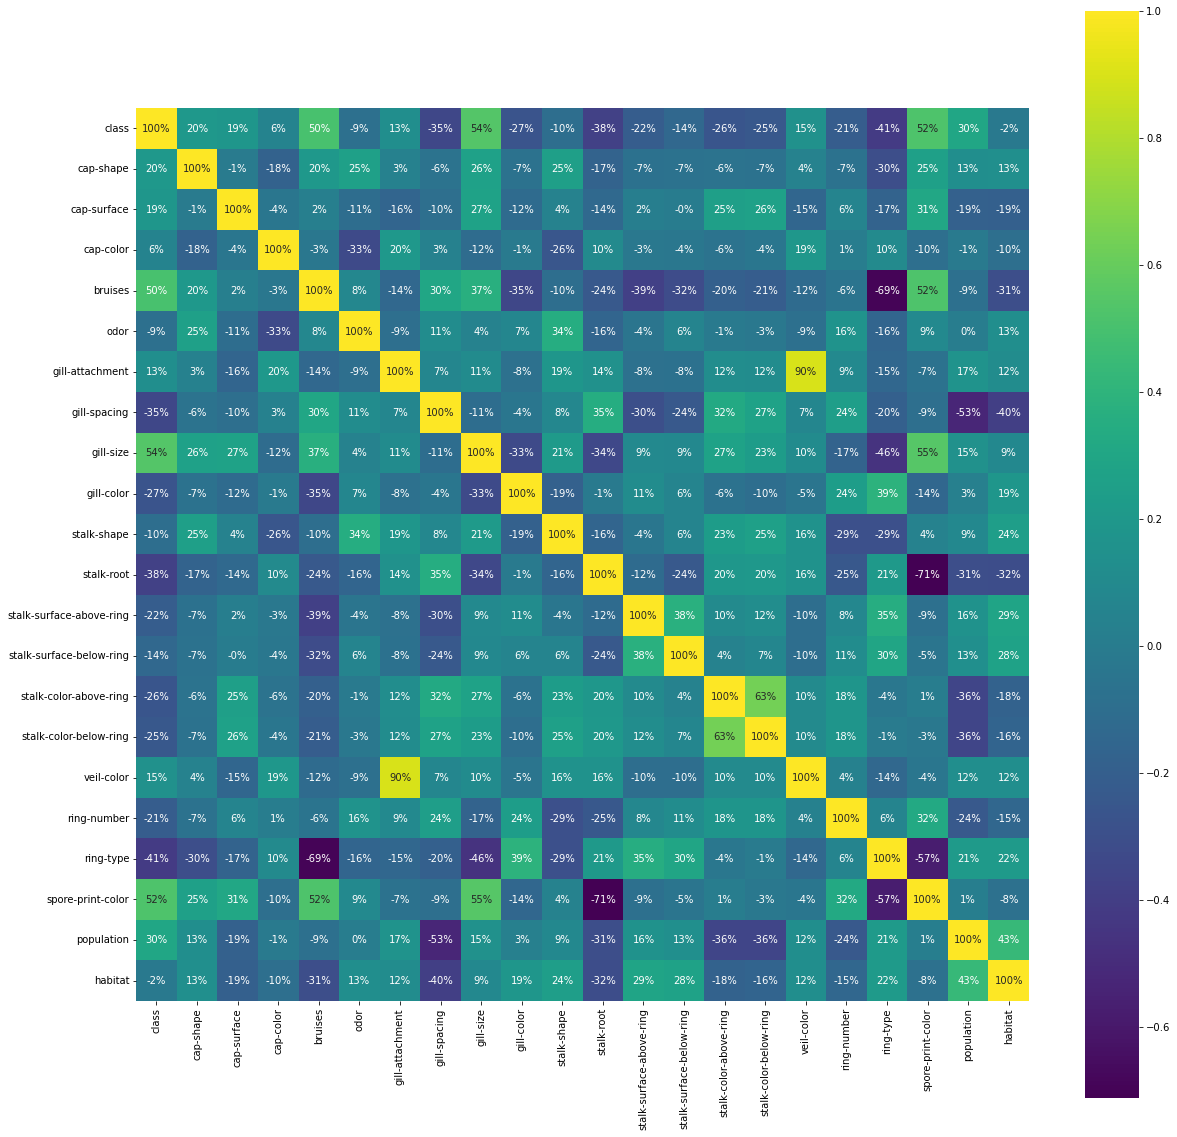

In [14]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),cmap="viridis",annot=True,fmt=".0%",square=True)

plt.show()

In [15]:
X = df[["cap-shape","cap-surface","bruises","gill-size","veil-color","spore-print-color","population"]]
y = df["class"]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7311, 7), (813, 7), (7311,), (813,))

In [18]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC()
}

In [19]:
cv = StratifiedKFold(n_splits=10)

In [20]:
estimation_stats = []

model = {
    "classifier": None,
    "score": 0.0
}

for c in classifiers:
    estimation = cross_validate(
        classifiers[c],
        X_train,
        y_train,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1,
        return_train_score=True,
        return_estimator=True
    )
    
    estimation_stats.append([c,np.amin(estimation["train_score"]),np.amin(estimation["test_score"])])
    
    if np.amin(estimation["test_score"]) >= model["score"]:
        model = {
            "classifier": estimation["estimator"][-1],
            "score": np.amin(estimation["test_score"])
        }

pd.DataFrame(data=estimation_stats,columns=["estimator","train_score","test_score"])

,estimator,train_score,test_score
0,LogisticRegression,0.809574,0.803279
1,KNeighborsClassifier,0.987386,0.983584
2,DecisionTreeClassifier,0.990424,0.987688
3,RandomForestClassifier,0.990424,0.987688
4,SVC,0.976292,0.971272


In [21]:
y_pred = model["classifier"].predict(X_test)

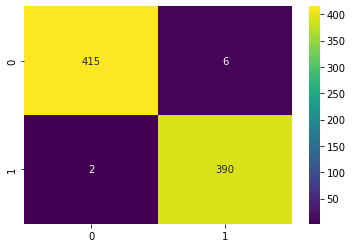

In [22]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),cmap="viridis",annot=True,fmt="g")

plt.show()

In [23]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       421
           1       0.98      0.99      0.99       392

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813

